In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Global_Mobile_Prices_2025_Extended.csv')

In [5]:
df.head()

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


###Data Exploration

In [6]:
# Let's first check the basic structure of our dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic info:")
df.info()

Dataset shape: (1000, 15)

Column names:
['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os', 'processor', 'rating', 'release_month', 'year']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          10

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64


In [8]:
# Get basic statistics for numerical columns
print("Basic statistics:")
df.describe()

Basic statistics:


,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


## Data Quality Check

In [9]:
# Check unique values in categorical columns
categorical_cols = ['brand', 'os', '5g_support', 'processor']
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))


brand unique values: 9
brand
Vivo       122
Google     116
OnePlus    116
Xiaomi     114
Oppo       110
Apple      107
Realme     105
Infinix    105
Samsung    105
Name: count, dtype: int64

os unique values: 2
os
Android    893
iOS        107
Name: count, dtype: int64

5g_support unique values: 2
5g_support
Yes    503
No     497
Name: count, dtype: int64

processor unique values: 8
processor
Dimensity 9300         138
Tensor G4              133
Snapdragon 8 Gen 3     132
Helio G99              128
Exynos 2400            124
Snapdragon 6 Gen 1     118
Snapdragon 7+ Gen 2    115
A18 Pro                112
Name: count, dtype: int64


##Initial Visualizations

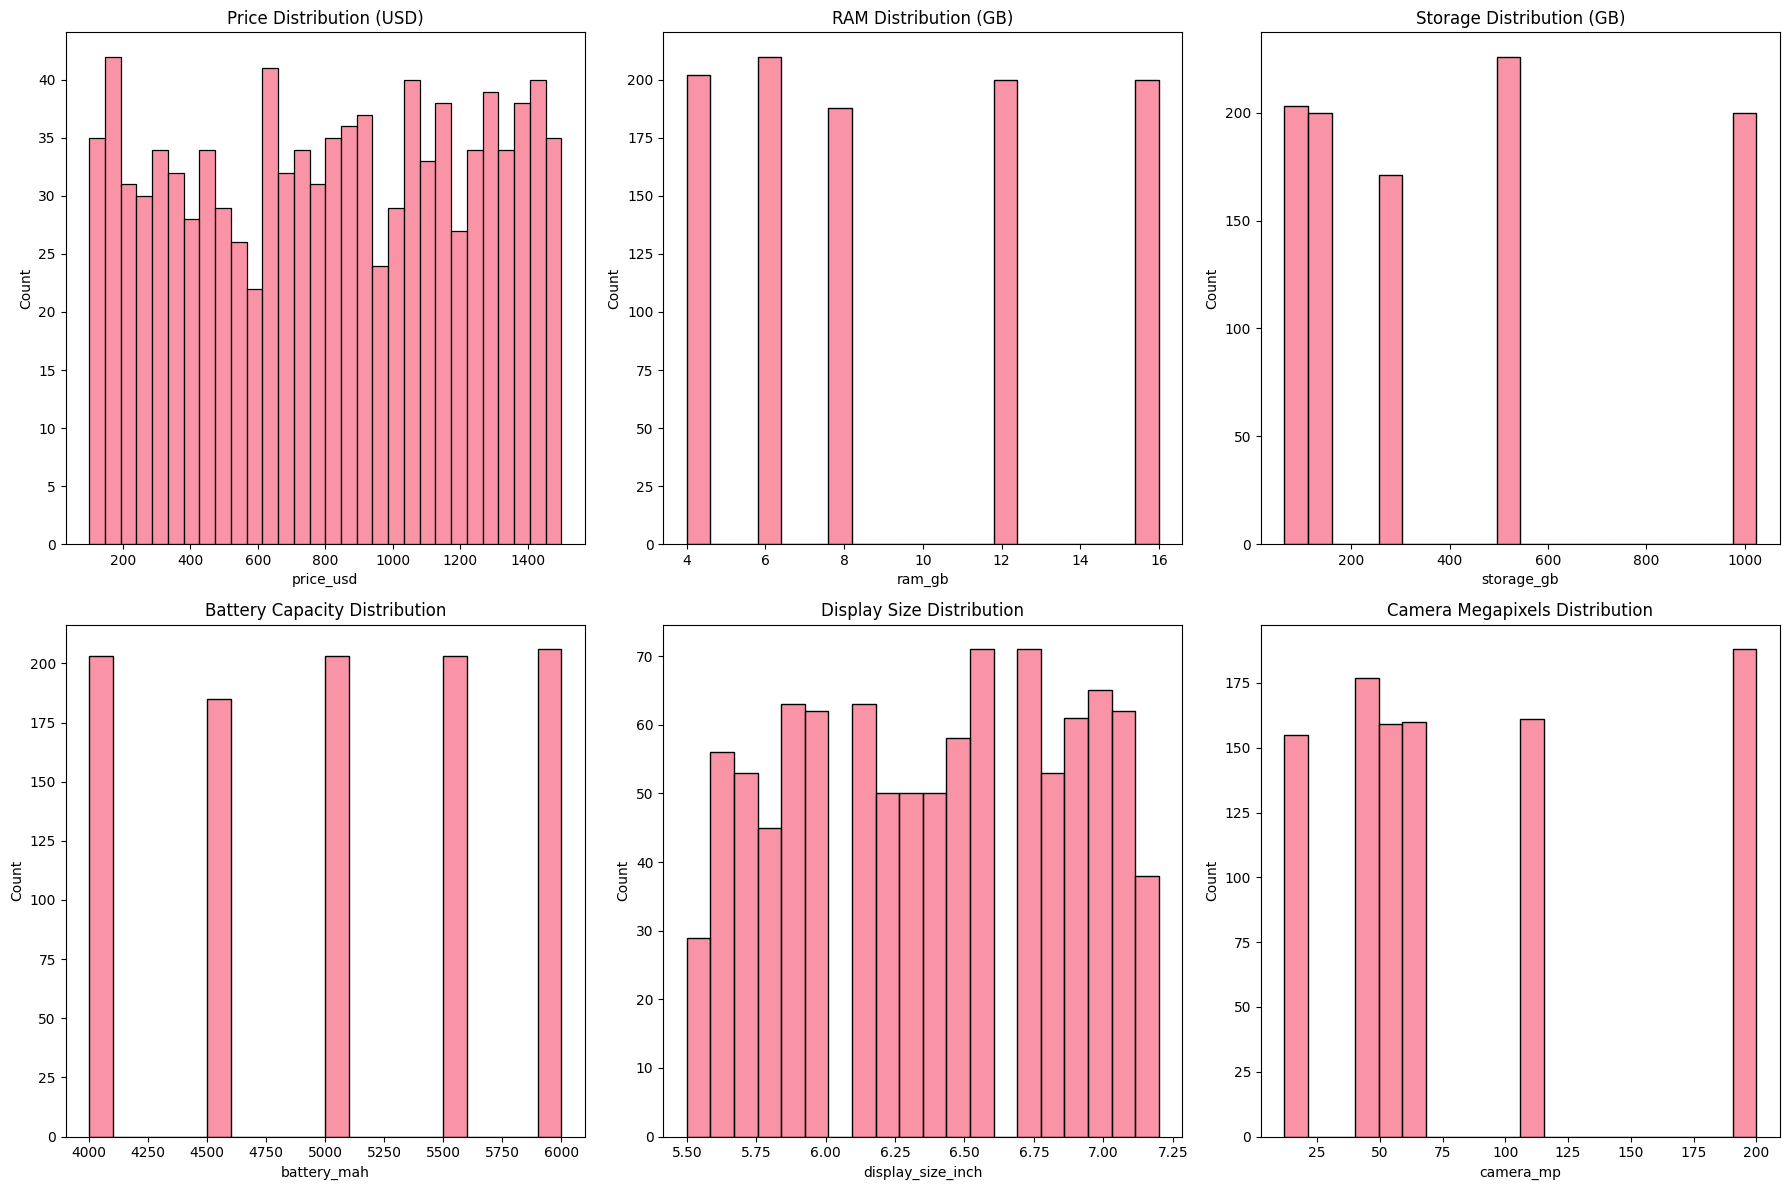

In [10]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price distribution
sns.histplot(df['price_usd'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Price Distribution (USD)')

# RAM distribution
sns.histplot(df['ram_gb'], bins=20, ax=axes[0,1])
axes[0,1].set_title('RAM Distribution (GB)')

# Storage distribution
sns.histplot(df['storage_gb'], bins=20, ax=axes[0,2])
axes[0,2].set_title('Storage Distribution (GB)')

# Battery distribution
sns.histplot(df['battery_mah'], bins=20, ax=axes[1,0])
axes[1,0].set_title('Battery Capacity Distribution')

# Display size distribution
sns.histplot(df['display_size_inch'], bins=20, ax=axes[1,1])
axes[1,1].set_title('Display Size Distribution')

# Camera distribution
sns.histplot(df['camera_mp'], bins=20, ax=axes[1,2])
axes[1,2].set_title('Camera Megapixels Distribution')

plt.tight_layout()
plt.show()